In [19]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets, transforms, models
from PIL import Image
import numpy as np
import ast
from torch.nn import functional as F
from math import log10
import matplotlib.pyplot as plt

import os
import random
import torch.utils.data
import torchvision.utils as vutils
import torch.backends.cudnn as cudnn

In [11]:
ls

processed/  raw/


In [12]:
# generating training list
with open('training_list.txt','w+') as f:
#     path = "/mnt/creeper/grad/luy2/anomaly_detection/Anomaly_Detection/data/ped1/training/frames" 
    path='/home/luy2/workspace/Anomaly_Detection/ped1/training/frames'
    path_list=os.listdir(path)
    path_list.sort()
    l1=[]
    for filename in path_list:
        path_list2=os.listdir(os.path.join(path,filename))
        path_list2.sort()
        for filename2 in path_list2:
            l1.append(os.path.join(path,filename,filename2)) 
    print(l1[2])
#     f.write(str(l1))

/home/luy2/workspace/Anomaly_Detection/ped1/training/frames/ped1_train_01/002.jpg


In [14]:
# generating testing list
with open('testing_list.txt','w+') as f:
#     path = "/mnt/creeper/grad/luy2/anomaly_detection/Anomaly_Detection/data/ped1/testing/frames" 
    path='/home/luy2/workspace/Anomaly_Detection/ped1/testing/frames'
    path_list=os.listdir(path)
    path_list.sort()
    l2=[]
    for filename in path_list:
        path_list2=os.listdir(os.path.join(path,filename))
        path_list2.sort()
        for filename2 in path_list2:
            l2.append(os.path.join(path,filename,filename2)) 
    print(l2[2])
#     f.write(str(l1))

/home/luy2/workspace/Anomaly_Detection/ped1/testing/frames/01/002.jpg


In [15]:
tf=transforms.Compose([transforms.Resize((256,256)),transforms.ToTensor()])

In [16]:
# training dataset class

class TrainingDataset(Dataset):
    def __init__(self, img, transform=None):
        self.img= img
        self.transform=transform
    
    def __getitem__(self, index):
        gt_path=self.img[index+3]
        print("gt path: {}".format(gt_path))
        im_path=[]
        for i in range(3):
            im_path.append(self.img[index+i])
        print("image path: {}".format(im_path))
        img=[]
        for im in im_path:
            im_opened=Image.open(im).convert('RGB')
            if self.transform is not None:
                img.append(self.transform(im_opened))
        img = torch.cat(img, 0)
        gt = Image.open(gt_path).convert('RGB')
        if self.transform is not None:
            gt = self.transform(gt)
        
        return (img, gt)

    def __len__(self):
        return len(self.img)


In [21]:
# testing dataset class

class TestingDataset(Dataset):
    def __init__(self, img, transform=None):
        self.img= img
        self.transform=transform
    
    def __getitem__(self, index):
        gt_path=self.img[index+3]
        print("gt path: {}".format(gt_path))
        im_path=[]
        for i in range(3):
            im_path.append(self.img[index+i])
        print("image path: {}".format(im_path))
        img=[]
        for im in im_path:
            im_opened=Image.open(im).convert('RGB')
            if self.transform is not None:
                img.append(self.transform(im_opened))
        gt = Image.open(gt_path).convert('RGB')
        if self.transform is not None:
            gt = self.transform(gt)
        
        return (img, gt)

    def __len__(self):
        return len(self.img)


gt path: /home/luy2/workspace/Anomaly_Detection/ped1/training/frames/ped1_train_01/003.jpg
image path: ['/home/luy2/workspace/Anomaly_Detection/ped1/training/frames/ped1_train_01/000.jpg', '/home/luy2/workspace/Anomaly_Detection/ped1/training/frames/ped1_train_01/001.jpg', '/home/luy2/workspace/Anomaly_Detection/ped1/training/frames/ped1_train_01/002.jpg']
===> Input image sequences


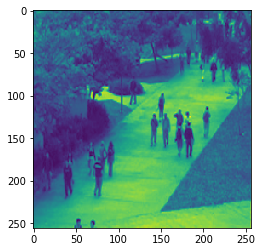

===> Ground-truth


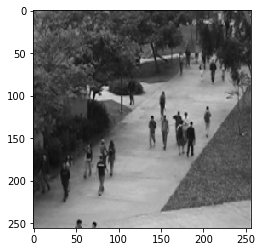

In [22]:
# Visualize the training data if you want

def roll_axis(img):
    img = np.rollaxis(img, -1, 0)
    img = np.rollaxis(img, -1, 0)
    return img

batch_size = 1
# train_data = TrainingDataset("/mnt/creeper/grad/luy2/anomaly_detection/Anomaly_Detection/training_list.txt", tf)
train_data = TrainingDataset(l1, tf)
dataloader = DataLoader(train_data,batch_size=batch_size)

for idx, data in enumerate(dataloader):
    print("===> Input image sequences")
    for im in data[0]:
        imgs = im.data.cpu().numpy()[0, :]
        imgs = roll_axis(imgs)
        plt.imshow(imgs)
        plt.show()
    
    print("===> Ground-truth")
    gt = roll_axis(data[1].data.cpu().numpy()[0, :])
    plt.imshow(gt)
    plt.show()
    break

gt path: /mnt/creeper/grad/luy2/anomaly_detection/Anomaly_Detection/data/ped1/testing/frames/01/003.jpg
image path: ['/mnt/creeper/grad/luy2/anomaly_detection/Anomaly_Detection/data/ped1/testing/frames/01/000.jpg', '/mnt/creeper/grad/luy2/anomaly_detection/Anomaly_Detection/data/ped1/testing/frames/01/001.jpg', '/mnt/creeper/grad/luy2/anomaly_detection/Anomaly_Detection/data/ped1/testing/frames/01/002.jpg']
===> Input image sequences


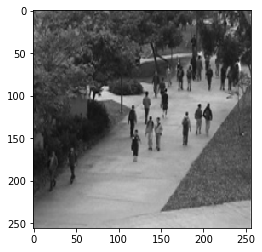

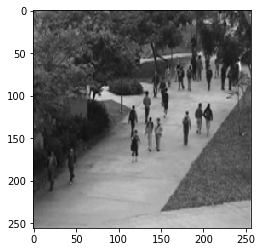

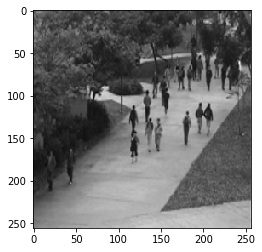

===> Ground-truth


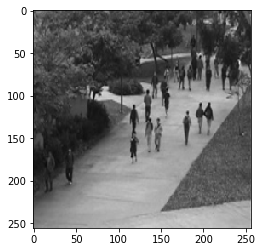

In [178]:
# Visualize the testing data if you want

def roll_axis(img):
    img = np.rollaxis(img, -1, 0)
    img = np.rollaxis(img, -1, 0)
    return img

batch_size = 1
# train_data = TrainingDataset("/mnt/creeper/grad/luy2/anomaly_detection/Anomaly_Detection/training_list.txt", tf)
train_data = TrainingDataset(l2, tf)
dataloader = DataLoader(train_data,batch_size=batch_size)

for idx, data in enumerate(dataloader):
    print("===> Input image sequences")
    for im in data[0]:
        imgs = im.data.cpu().numpy()[0, :]
        imgs = roll_axis(imgs)
        plt.imshow(imgs)
        plt.show()
    
    print("===> Ground-truth")
    gt = roll_axis(data[1].data.cpu().numpy()[0, :])
    plt.imshow(gt)
    plt.show()
    break

In [11]:
# defining the model
ngf = 64
ndf = 64
nc = 9
nz= 20

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.have_cuda = True

        self.encoder = nn.Sequential(
            # input is (nc) * 256 * 256
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 128*128
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 64 x 64
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 32*32
            nn.Conv2d(ndf * 4, 1024, 4, 1, 0, bias=False),
            # nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            # nn.Sigmoid()
        )

        self.decoder = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(1024, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2, 3, 4, 2, 1, bias=False),
            # nn.BatchNorm2d(ngf),
            # nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            # nn.ConvTranspose2d(    ngf,      nc, 4, 2, 1, bias=False),
            # nn.Tanh()
            nn.Sigmoid()
            # state size. (nc) x 64 x 64
        )

        self.fc1 = nn.Linear(1024, 512)
        self.fc21 = nn.Linear(512, nz)
        self.fc22 = nn.Linear(512, nz)

        self.fc3 = nn.Linear(nz, 512)
        self.fc4 = nn.Linear(512, 1024)

        self.lrelu = nn.LeakyReLU()
        self.relu = nn.ReLU()
        # self.sigmoid = nn.Sigmoid()

    def encode(self, x):
        conv = self.encoder(x);
#         print("encode conv", conv.size())
        h1 = self.fc1(conv.view(-1, 1024))
#         print("encode h1", h1.size())
#         print("self.fc21(h1)",self.fc21(h1).size())
#         print("self.fc22(h1)",self.fc22(h1).size())
        return self.fc21(h1), self.fc22(h1)
        

    def decode(self, z):
        h3 = self.relu(self.fc3(z))
        deconv_input = self.fc4(h3)
#         print("deconv_input", deconv_input.size())
        deconv_input = deconv_input.view(-1,1024,29,29)
#         print("deconv_input", deconv_input.size())
        return self.decoder(deconv_input)

    def reparametrize(self, mu, logvar):
        std = logvar.mul(0.5).exp_()
        if self.have_cuda:
            eps = torch.cuda.FloatTensor(std.size()).normal_()
        else:
            eps = torch.FloatTensor(std.size()).normal_()
        eps = Variable(eps)
        return eps.mul(std).add_(mu)

    def forward(self, x):
#         print("x", x.size())
        mu, logvar = self.encode(x)
#         print("mu, logvar", mu.size(), logvar.size())
        z = self.reparametrize(mu, logvar)
#         print("z", z.size())
        decoded = self.decode(z)
#         print("decoded", decoded.size())
        return decoded, mu, logvar

In [12]:
def loss_function(recon_x, x, mu, logvar):
    # print(recon_x.size(), x.size())
#     BCE = F.binary_cross_entropy(recon_x.view(-1, 1024), x.view(-1, 1024), size_average=False)
    BCE = F.binary_cross_entropy(recon_x, x, size_average=False)
    # BCE = nn.MSELoss(recon_x.view(-1, 1024), x.view(-1, 1024))	
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    psnr_error=(20 * log10( 65025/ ((torch.abs(torch.sum(x) - torch.sum(recon_batch))))))
    
    # return BCE + KLD
    return BCE, KLD, psnr_error
    # return BCE + 3 * KLD - psnr_erro

In [13]:
# training model
batch_size = 1
num_epochs=500
# total_step = len(dataloader)
model=VAE()
# model.cuda()
# define Transforms
tf = transforms.Compose([transforms.Resize((256,256)),transforms.ToTensor()])
# define dataloader
train_data = TrainingDataset(l1, tf)
dataloader = DataLoader(train_data,batch_size=batch_size)
# optimizer
total_step = len(dataloader)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

for eidx, epoch in enumerate(range(num_epochs)):
    for idx, data in enumerate(dataloader):
        img,gt = data
        print(img)
#         im = Variable(im.cuda())
        img=Variable(img)
        # print("im format:{}".format(im.size()))
#         gt= Variable(gt.cuda())
        gt=Variable(gt)
        recon_batch, mu, logvar = model(img)
        # print("Reconstructed format:{}".format(recon_batch.size()))
        BCE, KLD, psnr = loss_function(recon_batch, gt , mu, logvar)
        loss = 0.001 * BCE + 3 * KLD -  psnr
        psnr_error = psnr/batch_size
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print("BCE: {}, KLD: {}, PSNR: {}".format(BCE, KLD, psnr))
        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, psnr_error:{:.4f} '.format(epoch+1, num_epochs, idx+1, total_step, loss.item(), psnr_error))
    torch.save(model.state_dict(), './models/1/{}_model-ped.pt'.format(eidx + 1))

gt path: /mnt/creeper/grad/luy2/anomaly_detection/Anomaly_Detection/data/ped1/training/frames/ped1_train_01/003.jpg
image path: ['/mnt/creeper/grad/luy2/anomaly_detection/Anomaly_Detection/data/ped1/training/frames/ped1_train_01/000.jpg', '/mnt/creeper/grad/luy2/anomaly_detection/Anomaly_Detection/data/ped1/training/frames/ped1_train_01/001.jpg', '/mnt/creeper/grad/luy2/anomaly_detection/Anomaly_Detection/data/ped1/training/frames/ped1_train_01/002.jpg']
tensor([[[[0.4510, 0.4706, 0.4078,  ..., 0.2471, 0.2706, 0.2627],
          [0.4039, 0.4039, 0.3725,  ..., 0.2510, 0.2706, 0.2980],
          [0.3412, 0.3137, 0.3294,  ..., 0.2549, 0.2627, 0.3451],
          ...,
          [0.4980, 0.5098, 0.5137,  ..., 0.6784, 0.6784, 0.7529],
          [0.5059, 0.5216, 0.5255,  ..., 0.6902, 0.6863, 0.7608],
          [0.5137, 0.5294, 0.5373,  ..., 0.6980, 0.6941, 0.7647]],

         [[0.4510, 0.4706, 0.4078,  ..., 0.2471, 0.2706, 0.2627],
          [0.4039, 0.4039, 0.3725,  ..., 0.2510, 0.2706, 0.298

AssertionError: 
The NVIDIA driver on your system is too old (found version 8000).
Please update your GPU driver by downloading and installing a new
version from the URL: http://www.nvidia.com/Download/index.aspx
Alternatively, go to: https://pytorch.org to install
a PyTorch version that has been compiled with your version
of the CUDA driver.